In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt

### Load and merge per game and advanced data

In [2]:
per_game = pd.read_csv(Path('../data/per_game_data.csv'))
advanced = pd.read_csv(Path('../data/advanced_data.csv'))
advanced.drop(columns=['MP'], inplace=True)

data = per_game.merge(advanced, on=['Player', 'Pos', 'Age', 'Tm', 'G', 'season', 'all_nba_1st_team'])
data.dropna(axis=1, how='all', inplace=True)

data.shape

(8295, 51)

### filter data

In [3]:
data.drop(columns=['Player', 'Pos', 'Age', 'Tm', 'season'], inplace=True)
data.drop(columns=['GS'], inplace=True)

data = data[data.G > 40]
data = data[data.MP > 25]

data.drop(columns=['FG%', '2P%', '3P%', 'FT%'], inplace=True)

In [4]:
data.shape

(2121, 41)

## feature selection

In [5]:
X = data.drop(columns=['all_nba_1st_team'])
y = data['all_nba_1st_team']

### Correlations

In [6]:
corrcoefs = []
for feature in X.columns:
    corrcoef = np.corrcoef(X[feature].values, y)[0, 1]
    corrcoefs.append(corrcoef)
    print(feature, corrcoef)

G 0.03856770699553157
MP 0.16309745644954804
FG 0.24430730283655688
FGA 0.18568833002300494
3P -0.050578305357490506
3PA -0.050782393257038844
2P 0.25394865282113366
2PA 0.20718985902468012
eFG% 0.1409018881160049
FT 0.2510844822390895
FTA 0.3150027010958012
ORB 0.14321775434652678
DRB 0.20365223372349955
TRB 0.20689860444933705
AST 0.08398926389487447
STL 0.1085266316963769
BLK 0.2522537293330294
TOV 0.18924421876640257
PF 0.03982479686627616
PTS 0.2529194662900637
PER 0.29504738544525316
TS% 0.12936712294781963
3PAr -0.056480582663346796
FTr 0.1944225696206518
ORB% 0.0817130258180445
DRB% 0.12016037902127553
TRB% 0.13232034829561296
AST% 0.07851474979152086
STL% 0.050593280585955316
BLK% 0.18549275072033228
TOV% -0.018722428486972198
USG% 0.19171495106333641
OWS 0.22877386875671896
DWS 0.24671522177503277
WS 0.2794028650381951
WS/48 0.2500618213289933
OBPM 0.22978768959958612
DBPM 0.17027180808435666
BPM 0.2645405413108715
VORP 0.29122086658163876


In [7]:
X.corr()

,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
G,1.000000,0.088742,0.036944,-0.007838,-0.066970,-0.073400,0.055088,0.021339,0.129536,0.024921,...,0.033617,-0.092239,0.283106,0.404667,0.388127,0.121051,0.041154,0.071885,0.067236,0.201736
MP,0.088742,1.000000,0.679614,0.674901,0.050186,0.065528,0.652107,0.654909,0.033883,0.591613,...,-0.130750,0.413535,0.486066,0.438207,0.556759,0.345667,0.525634,0.103964,0.469188,0.562295
FG,0.036944,0.679614,1.000000,0.959579,0.072799,0.087122,0.959489,0.933374,0.159583,0.730887,...,-0.339554,0.872350,0.547669,0.293219,0.541456,0.427200,0.709375,-0.022246,0.555094,0.606633
FGA,-0.007838,0.674901,0.959579,1.000000,0.199275,0.219745,0.884338,0.921461,-0.070491,0.693582,...,-0.398707,0.906467,0.405983,0.227777,0.405891,0.275468,0.628463,-0.082634,0.461783,0.515088
3P,-0.066970,0.050186,0.072799,0.199275,1.000000,0.992576,-0.210561,-0.194195,0.060505,-0.055716,...,-0.338712,0.159797,0.043570,-0.122496,-0.019032,-0.015095,0.249837,-0.078174,0.161354,0.134526
3PA,-0.073400,0.065528,0.087122,0.219745,0.992576,1.000000,-0.194778,-0.176282,0.034492,-0.042817,...,-0.337927,0.179081,0.033231,-0.120607,-0.026156,-0.027160,0.250614,-0.076533,0.162805,0.137500
2P,0.055088,0.652107,0.959489,0.884338,-0.210561,-0.194778,1.000000,0.969720,0.139257,0.732267,...,-0.237357,0.809891,0.524499,0.321995,0.536084,0.422890,0.624648,0.000262,0.498431,0.556594
2PA,0.021339,0.654909,0.933374,0.921461,-0.194195,-0.176282,0.969720,1.000000,-0.085469,0.716684,...,-0.267989,0.843260,0.396083,0.277847,0.419715,0.288407,0.534133,-0.052671,0.401073,0.464942
eFG%,0.129536,0.033883,0.159583,-0.070491,0.060505,0.034492,0.139257,-0.085469,1.000000,0.081108,...,0.059323,-0.068489,0.524029,0.165664,0.469041,0.548619,0.416427,0.156026,0.406260,0.372607
FT,0.024921,0.591613,0.730887,0.693582,-0.055716,-0.042817,0.732267,0.716684,0.081108,1.000000,...,-0.097273,0.709893,0.613934,0.284043,0.587837,0.515315,0.651887,0.017127,0.527889,0.572864


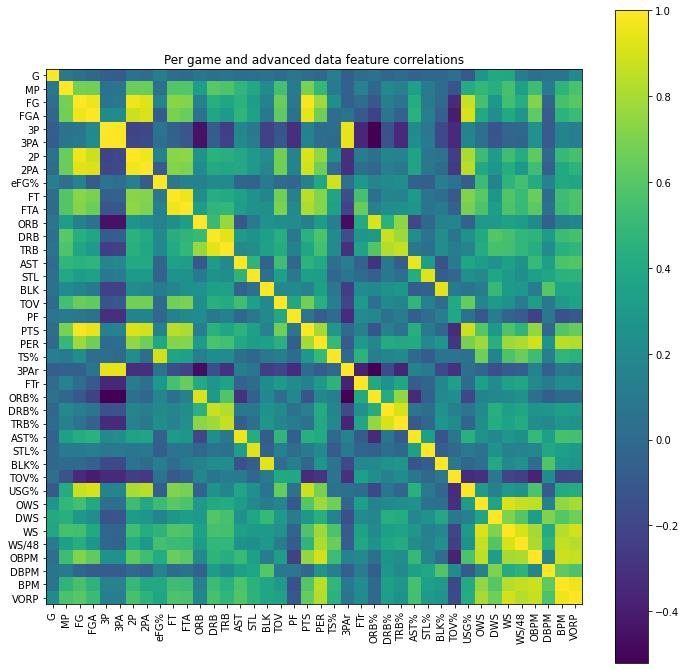

In [8]:
feature_names = X.columns
number_of_features = len(feature_names)

plt.figure(figsize = (12, 12))
plt.xticks(range(0, number_of_features), feature_names, rotation='vertical')
plt.yticks(range(0, number_of_features), feature_names)

plt.imshow(X.corr())
plt.colorbar()

plt.title('Per game and advanced data feature correlations')
plt.show()

In [9]:
X[['TS%', 'eFG%']].corr()

,TS%,eFG%
TS%,1.000000,0.898475
eFG%,0.898475,1.000000


In [10]:
X[['PER', 'WS', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']].corr()

,PER,WS,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP
PER,1.000000,0.777204,0.775194,0.439976,0.810861,0.895965,0.268482,0.842571,0.824133
WS,0.777204,1.000000,0.917706,0.707640,0.910613,0.792416,0.413477,0.828823,0.894723
OWS,0.775194,0.917706,1.000000,0.369098,0.865695,0.856284,0.148214,0.753080,0.803689
DWS,0.439976,0.707640,0.369098,1.000000,0.591113,0.331187,0.703820,0.599902,0.664183
WS/48,0.810861,0.910613,0.865695,0.591113,1.000000,0.806615,0.459967,0.862080,0.830755
OBPM,0.895965,0.792416,0.856284,0.331187,0.806615,1.000000,0.180537,0.882947,0.866937
DBPM,0.268482,0.413477,0.148214,0.703820,0.459967,0.180537,1.000000,0.620782,0.572361
BPM,0.842571,0.828823,0.753080,0.599902,0.862080,0.882947,0.620782,1.000000,0.964138
VORP,0.824133,0.894723,0.803689,0.664183,0.830755,0.866937,0.572361,0.964138,1.000000


In [11]:
X[['PTS', 'USG%']].corr()

,PTS,USG%
PTS,1.000000,0.884444
USG%,0.884444,1.000000


In [12]:
X[['FGA', 'USG%']].corr()

,FGA,USG%
FGA,1.000000,0.906467
USG%,0.906467,1.000000


In [13]:
X[['TOV', 'USG%']].corr()

,TOV,USG%
TOV,1.000000,0.638872
USG%,0.638872,1.000000


In [14]:
X[['TRB', 'TRB%']].corr()

,TRB,TRB%
TRB,1.00000,0.86797
TRB%,0.86797,1.00000


In [15]:
X[['ORB', 'ORB%']].corr()

,ORB,ORB%
ORB,1.000000,0.916894
ORB%,0.916894,1.000000


In [16]:
X[['DRB', 'DRB%']].corr()

,DRB,DRB%
DRB,1.000000,0.874631
DRB%,0.874631,1.000000


In [17]:
X[['AST', 'AST%']].corr()

,AST,AST%
AST,1.00000,0.95945
AST%,0.95945,1.00000


In [18]:
X[['STL', 'STL%']].corr()

,STL,STL%
STL,1.000000,0.931631
STL%,0.931631,1.000000


In [19]:
X[['BLK', 'BLK%']].corr()

,BLK,BLK%
BLK,1.000000,0.938428
BLK%,0.938428,1.000000


In [20]:
X[['TOV', 'TOV%']].corr()

,TOV,TOV%
TOV,1.00000,0.40493
TOV%,0.40493,1.00000


### RFE

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 27)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [24]:
grid_rfc = {
    'n_estimators': np.linspace(start=50, stop=300, num=5, dtype=int),
    'criterion': ['gini'],
    'max_depth': np.linspace(start=10, stop=100, num=5, dtype=int),
    'random_state': [27]
}


In [25]:
smote = SMOTE(random_state=27, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [26]:
clf = GridSearchCV(RandomForestClassifier(), param_grid=grid_rfc, scoring='recall', cv=10)
clf.fit(X_train_resampled, y_train_resampled)

rfe = RFE(clf.best_estimator_, n_features_to_select=20, verbose=0)
rfe.fit(X_train_resampled, y_train_resampled)

X.columns[rfe.support_]

Index(['2P', 'eFG%', 'FT', 'FTA', 'BLK', 'TOV', 'PTS', 'PER', 'TS%', 'FTr',
       'AST%', 'BLK%', 'USG%', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP'],
      dtype='object')

In [27]:
## Same thing, but for per 100 and advanced data

In [28]:
per_poss = pd.read_csv(Path('../data/per_100_data.csv'))
advanced = pd.read_csv(Path('../data/advanced_data.csv'))

data = per_poss.merge(advanced, on=['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'season', 'all_nba_1st_team'])
data.dropna(axis=1, how='all', inplace=True)

data.shape

(8295, 52)

In [29]:
# transfer minutes to per game stat instead of season total
data['MP'] = np.round(data['MP'] / data['G'], 1)

In [30]:
data.drop(columns=['Player', 'Pos', 'Age', 'Tm', 'season'], inplace=True)
data.drop(columns=['GS'], inplace=True)

data = data[data.G > 40]
data = data[data.MP > 25]

data.drop(columns=['FG%', '2P%', '3P%', 'FT%'], inplace=True)

### Correlations

In [31]:
X = data.drop(columns=['all_nba_1st_team'])
y = data['all_nba_1st_team']

In [32]:
corrcoefs = []
for feature in X.columns:
    corrcoef = np.corrcoef(X[feature].values, y)[0, 1]
    corrcoefs.append(corrcoef)
    print(feature, corrcoef)

G 0.03856770699553157
MP 0.16295387606083833
FG 0.2098239274253454
FGA 0.13723654532970161
3P -0.05160037581555299
3PA -0.052461543070108314
2P 0.21837081656168497
2PA 0.16224522987153903
FT 0.21985285831149834
FTA 0.2880453992242222
ORB 0.06955721945829937
DRB 0.14070912429081756
TRB 0.13335073334480688
AST 0.05210119061578786
STL 0.05063498228392579
BLK 0.1949720702274048
TOV 0.1411417015425585
PF -0.05884169244233915
PTS 0.22280940237822106
ORtg 0.09431352658019763
DRtg -0.17734865315403311
PER 0.29504738544525316
TS% 0.12936712294781963
3PAr -0.056480582663346796
FTr 0.1944225696206518
ORB% 0.0817130258180445
DRB% 0.12016037902127553
TRB% 0.13232034829561296
AST% 0.07851474979152086
STL% 0.050593280585955316
BLK% 0.18549275072033228
TOV% -0.018722428486972198
USG% 0.19171495106333641
OWS 0.22877386875671896
DWS 0.24671522177503277
WS 0.2794028650381951
WS/48 0.2500618213289933
OBPM 0.22978768959958612
DBPM 0.17027180808435666
BPM 0.2645405413108715
VORP 0.29122086658163876


In [33]:
X.corr()

,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
G,1.000000,0.088675,-0.033779,-0.091400,-0.070474,-0.077407,-0.006618,-0.050249,-0.023426,-0.033826,...,0.033617,-0.092239,0.283106,0.404667,0.388127,0.121051,0.041154,0.071885,0.067236,0.201736
MP,0.088675,1.000000,0.406701,0.382875,-0.012130,-0.004052,0.390875,0.379774,0.405868,0.397305,...,-0.130702,0.413565,0.485990,0.438169,0.556684,0.345581,0.525566,0.103893,0.469101,0.562218
FG,-0.033779,0.406701,1.000000,0.933082,0.052714,0.059600,0.930311,0.889368,0.606749,0.585231,...,-0.412687,0.937007,0.452222,0.175156,0.418541,0.389393,0.651774,-0.079616,0.481647,0.493523
FGA,-0.091400,0.382875,0.933082,1.000000,0.218068,0.232386,0.805964,0.866627,0.550688,0.490645,...,-0.485308,0.963186,0.263797,0.085004,0.236914,0.186939,0.535611,-0.155736,0.352698,0.367618
3P,-0.070474,-0.012130,0.052714,0.218068,1.000000,0.993306,-0.316892,-0.294566,-0.114664,-0.193420,...,-0.342395,0.132486,0.014625,-0.143824,-0.050137,-0.034524,0.219657,-0.082640,0.135146,0.101278
3PA,-0.077407,-0.004052,0.059600,0.232386,0.993306,1.000000,-0.308112,-0.283803,-0.107041,-0.185134,...,-0.341170,0.147843,0.001798,-0.145063,-0.060477,-0.048204,0.216717,-0.082549,0.132872,0.099890
2P,-0.006618,0.390875,0.930311,0.805964,-0.316892,-0.308112,1.000000,0.952674,0.618488,0.626890,...,-0.265839,0.841214,0.424375,0.219035,0.416047,0.382751,0.538634,-0.045137,0.408092,0.431701
2PA,-0.050249,0.379774,0.889368,0.866627,-0.294566,-0.283803,0.952674,1.000000,0.598148,0.578973,...,-0.303273,0.873844,0.259385,0.158614,0.264932,0.209322,0.417084,-0.110796,0.279911,0.311566
FT,-0.023426,0.405868,0.606749,0.550688,-0.114664,-0.107041,0.618488,0.598148,1.000000,0.946315,...,-0.090938,0.708386,0.550728,0.205315,0.506184,0.497102,0.591272,-0.011807,0.465634,0.482935
FTA,-0.033826,0.397305,0.585231,0.490645,-0.193420,-0.185134,0.626890,0.578973,0.946315,1.000000,...,-0.017802,0.674675,0.499943,0.252197,0.487375,0.479721,0.547591,0.019851,0.446170,0.463425


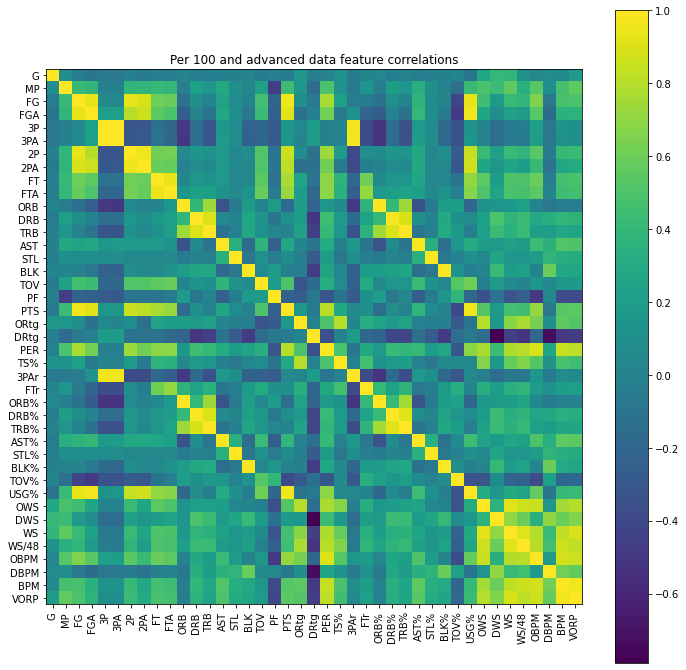

In [34]:
feature_names = X.columns
number_of_features = len(feature_names)

plt.figure(figsize = (12, 12))
plt.xticks(range(0, number_of_features), feature_names, rotation='vertical')
plt.yticks(range(0, number_of_features), feature_names)

plt.imshow(X.corr())
plt.colorbar()

plt.title('Per 100 and advanced data feature correlations')
plt.show()

In [35]:
X[['PER', 'WS', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']].corr()

,PER,WS,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP
PER,1.000000,0.777204,0.775194,0.439976,0.810861,0.895965,0.268482,0.842571,0.824133
WS,0.777204,1.000000,0.917706,0.707640,0.910613,0.792416,0.413477,0.828823,0.894723
OWS,0.775194,0.917706,1.000000,0.369098,0.865695,0.856284,0.148214,0.753080,0.803689
DWS,0.439976,0.707640,0.369098,1.000000,0.591113,0.331187,0.703820,0.599902,0.664183
WS/48,0.810861,0.910613,0.865695,0.591113,1.000000,0.806615,0.459967,0.862080,0.830755
OBPM,0.895965,0.792416,0.856284,0.331187,0.806615,1.000000,0.180537,0.882947,0.866937
DBPM,0.268482,0.413477,0.148214,0.703820,0.459967,0.180537,1.000000,0.620782,0.572361
BPM,0.842571,0.828823,0.753080,0.599902,0.862080,0.882947,0.620782,1.000000,0.964138
VORP,0.824133,0.894723,0.803689,0.664183,0.830755,0.866937,0.572361,0.964138,1.000000


In [36]:
X[['PTS', 'USG%']].corr()

,PTS,USG%
PTS,1.00000,0.95908
USG%,0.95908,1.00000


In [37]:
X[['FGA', 'USG%']].corr()

,FGA,USG%
FGA,1.000000,0.963186
USG%,0.963186,1.000000


In [38]:
X[['TOV', 'USG%']].corr()

,TOV,USG%
TOV,1.000000,0.602238
USG%,0.602238,1.000000


In [39]:
X[['TRB', 'TRB%']].corr()

,TRB,TRB%
TRB,1.000000,0.986187
TRB%,0.986187,1.000000


In [40]:
X[['DRB', 'DRB%']].corr()

,DRB,DRB%
DRB,1.000000,0.979832
DRB%,0.979832,1.000000


In [41]:
X[['ORB', 'ORB%']].corr()

,ORB,ORB%
ORB,1.000000,0.988571
ORB%,0.988571,1.000000


In [42]:
X[['AST', 'AST%']].corr()

,AST,AST%
AST,1.000000,0.979957
AST%,0.979957,1.000000


In [43]:
X[['STL', 'STL%']].corr()

,STL,STL%
STL,1.000000,0.999951
STL%,0.999951,1.000000


In [44]:
X[['BLK', 'BLK%']].corr()

,BLK,BLK%
BLK,1.00000,0.97975
BLK%,0.97975,1.00000


In [45]:
X[['TOV', 'TOV%']].corr()

,TOV,TOV%
TOV,1.000000,0.527376
TOV%,0.527376,1.000000


### ------------------------------------

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 27)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
smote = SMOTE(random_state=27, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [48]:
clf = GridSearchCV(RandomForestClassifier(), param_grid=grid_rfc, scoring='recall', cv=10)
clf.fit(X_train_resampled, y_train_resampled)

rfe = RFE(clf.best_estimator_, n_features_to_select=20, verbose=0)
rfe.fit(X_train_resampled, y_train_resampled)

X.columns[rfe.support_]

Index(['2P', 'FT', 'FTA', 'AST', 'BLK', 'TOV', 'PTS', 'DRtg', 'PER', 'TS%',
       'AST%', 'BLK%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'BPM',
       'VORP'],
      dtype='object')